<a href="https://colab.research.google.com/github/CristianoDataScience/code-bar-test-project/blob/main/cod_bar_test_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
from google.colab.patches import cv2_imshow
from pyzbar import pyzbar

Exibindo imagem: /content/drive/MyDrive/cod_bar_test_project_grup/codigo_01.jpg


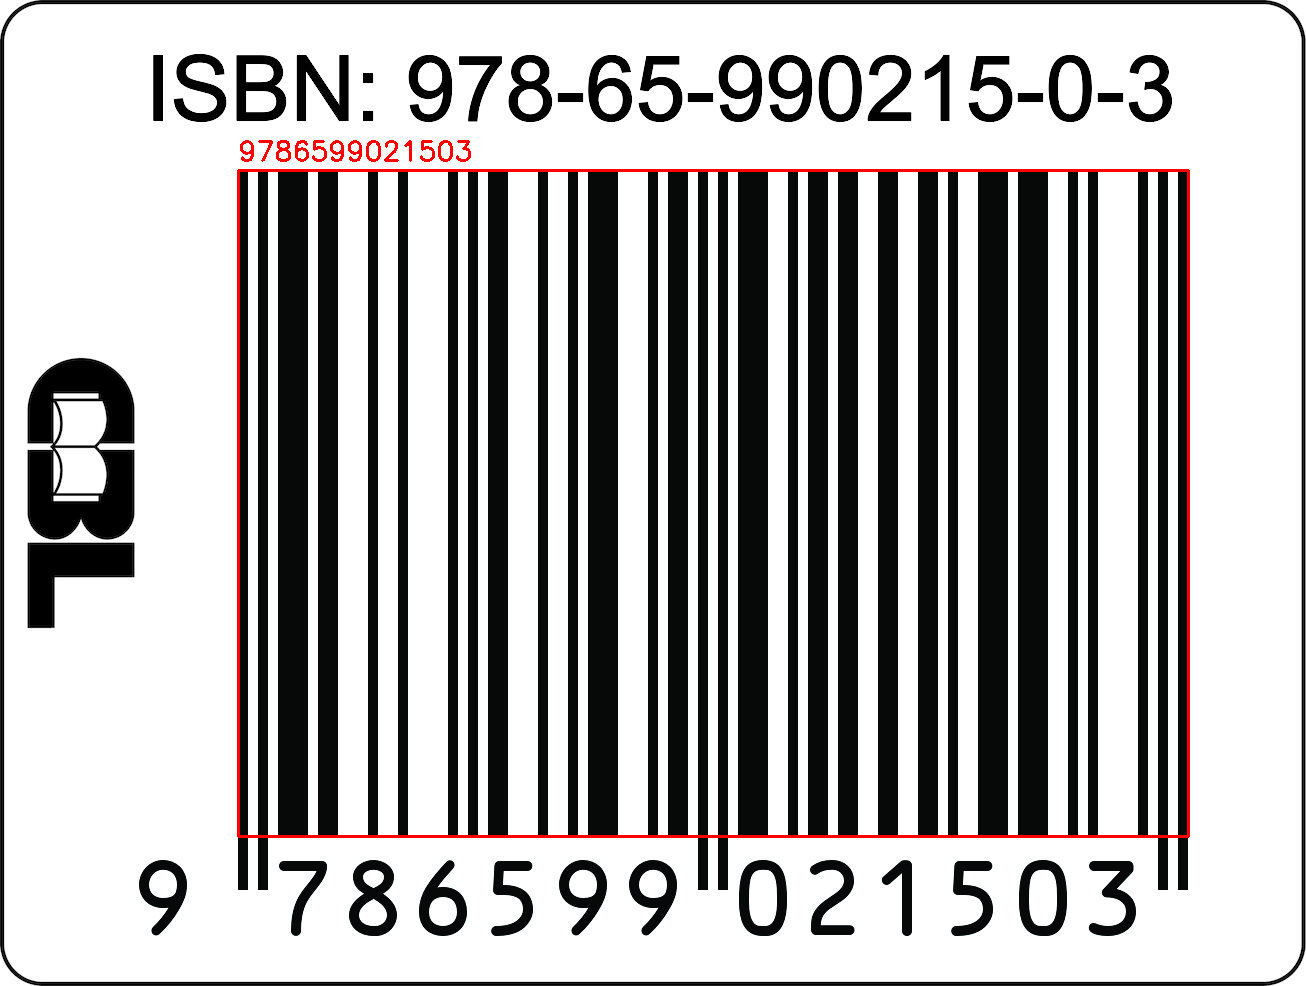

Exibindo imagem: /content/drive/MyDrive/cod_bar_test_project_grup/codigo_02.jpg


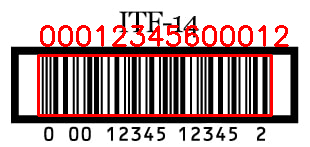

Exibindo imagem: /content/drive/MyDrive/cod_bar_test_project_grup/codigo_03.jpeg


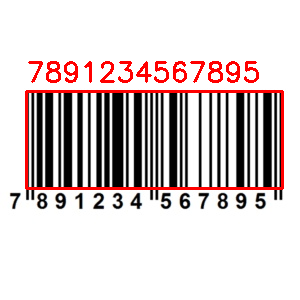

Exibindo imagem: /content/drive/MyDrive/cod_bar_test_project_grup/codigo_04.png


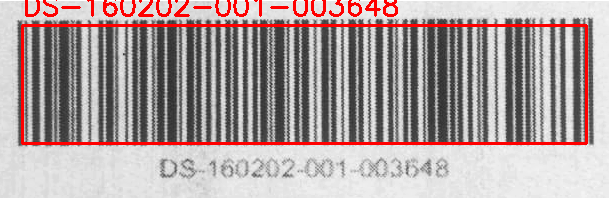

In [32]:
# detectar código de barras
def process_barcode_images(*image_paths):
    for path in image_paths:
        # Carregar a imagem
        img = cv2.imread(path)

        if img is None:
            print(f"Error: Could not load image {path}")
            continue

        # detectar códigos de barras na imagem
        barcodes = pyzbar.decode(img)

        # verificar se encontrou algum código de barras
        if len(barcodes) > 0:
            # percorrer os códigos de barras detectados
            for barcode in barcodes:
                # pegar as coordenadas do retângulo que envolve o código de barras
                (x, y, w, h) = barcode.rect

                # desenhar o retângulo vermelho ao redor do código de barras
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

                # obter o número do código de barras
                barcode_data = barcode.data.decode("utf-8")

                # colocar o número acima do retângulo
                cv2.putText(img, barcode_data, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            # exibir a imagem processada
            print(f"Exibindo imagem: {path}")
            cv2_imshow(img)
        else:
            print(f"Nenhum código de barras encontrado na imagem: {path}")

        # esperar uma tecla para fechar a janela
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# lista de caminhos para as imagens
path_01 = '/content/drive/MyDrive/cod_bar_test_project_grup/codigo_01.jpg'
path_02 = '/content/drive/MyDrive/cod_bar_test_project_grup/codigo_02.jpg'
path_03 = '/content/drive/MyDrive/cod_bar_test_project_grup/codigo_03.jpeg'
path_04 = '/content/drive/MyDrive/cod_bar_test_project_grup/codigo_04.png'

# chamar a função para processar todas as imagens
process_barcode_images(path_01, path_02, path_03, path_04)